In [1]:
import os, shutil
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from keras import models
import tensorflow as tf
from keras.preprocessing import image

2024-03-04 12:18:22.963165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 12:18:22.963223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 12:18:22.994943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 12:18:23.069417: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 12:18:24.205721: W tensorflow/compiler/tf2

In [2]:
train_dir = 'cats_and_dogs_small/train'
validation_dir = 'cats_and_dogs_small/validation'
test_dir = 'cats_and_dogs_small/test'
train_cats_dir = 'cats_and_dogs_small/train/cats'
train_dogs_dir = 'cats_and_dogs_small/train/dogs'
val_cats_dir = 'cats_and_dogs_small/validation/cats'
val_dogs_dir = 'cats_and_dogs_small/validation/dogs'
test_cats_dir = 'cats_and_dogs_small/test/cats'
test_dogs_dir = 'cats_and_dogs_small/test/dogs'
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total testing cat images: 500
total testing dog images: 500


In [3]:
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(train_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
validation_dataset = image_dataset_from_directory(validation_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE),batch_size=32)

Found 2000 files belonging to 2 classes.


2024-03-04 12:18:25.152139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 12:18:25.323780: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 12:18:25.324077: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


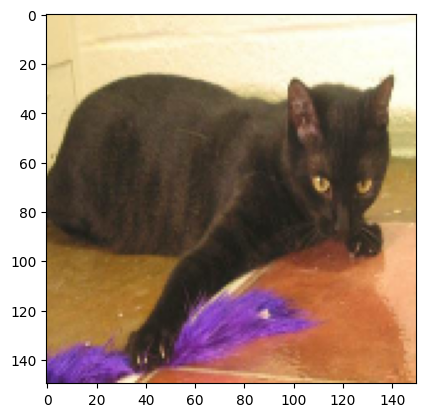

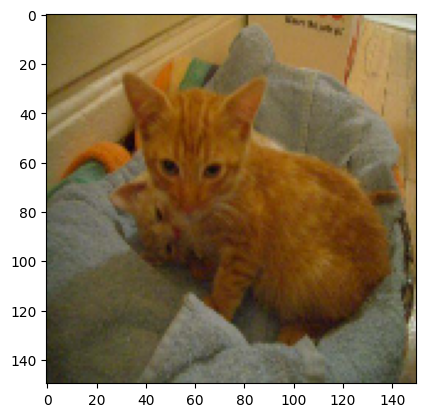

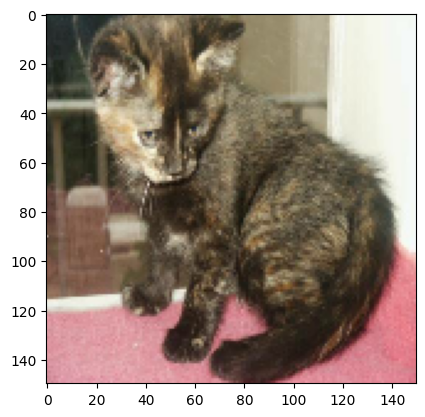

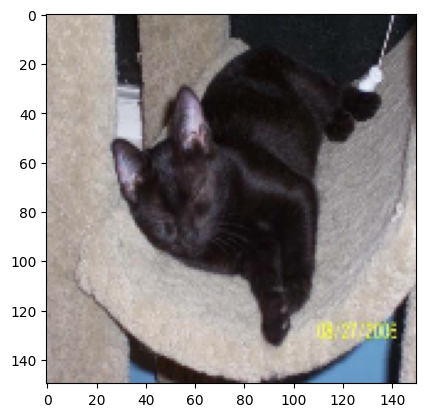

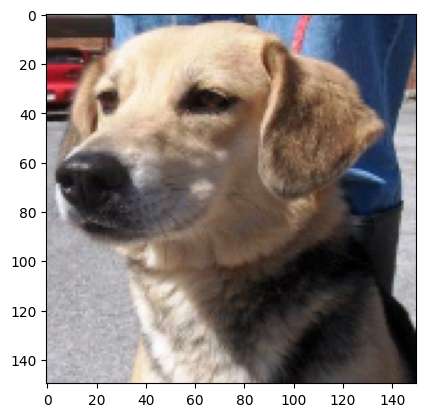

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

In [8]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30


2024-03-04 12:18:29.622603: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-04 12:18:29.945354: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-04 12:18:31.887913: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f84e84dca90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 12:18:31.887955: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-03-04 12:18:31.899814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709554711.959976   45313 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 [==============================] - 9s 68ms/step - loss: 0.6935 - acc: 0.5015 - val_loss: 0.6889 - val_acc: 0.5620
Epoch 2/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6849 - acc: 0.5540 - val_loss: 0.6857 - val_acc: 0.5010
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6726 - acc: 0.5840 - val_loss: 0.6785 - val_acc: 0.5310
Epoch 4/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6547 - acc: 0.6125 - val_loss: 0.6674 - val_acc: 0.5670
Epoch 5/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6377 - acc: 0.6280 - val_loss: 0.6340 - val_acc: 0.6450
Epoch 6/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6121 - acc: 0.6675 - val_loss: 0.6348 - val_acc: 0.6300
Epoch 7/30
63/63 [==============================] - 3s 40ms/step - loss: 0.5898 - acc: 0.6890 - val_loss: 0.6053 - val_acc: 0.6580
Epoch 8/30
63/63 [==============================] - 3s 41ms/step - loss: 0.5671 - acc: 0.7155 

In [16]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

32/32 [==============================] - 1s 15ms/step - loss: 0.5969 - acc: 0.7380
val_acc: 0.7379999756813049


In [11]:
# model.save('models/04_CNN_02_CatsAndDogs_01_cnn_from_scratch.h5')

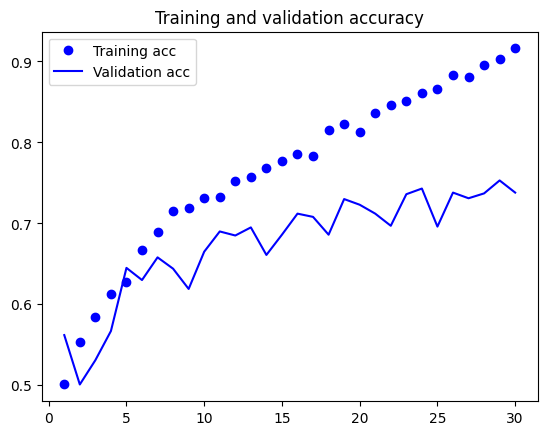

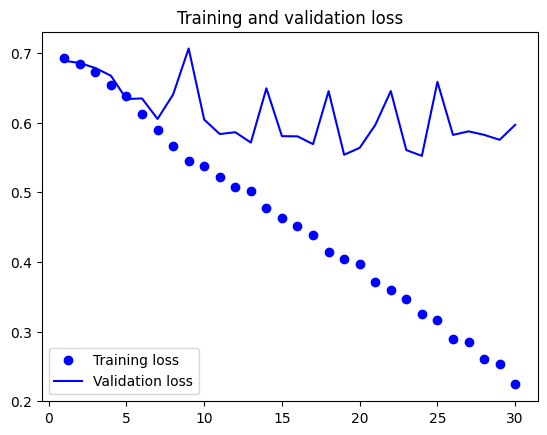

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs_small/validation/dogs/dog.1010.jpg', target_size=(150, 150), interpolation='bilinear')

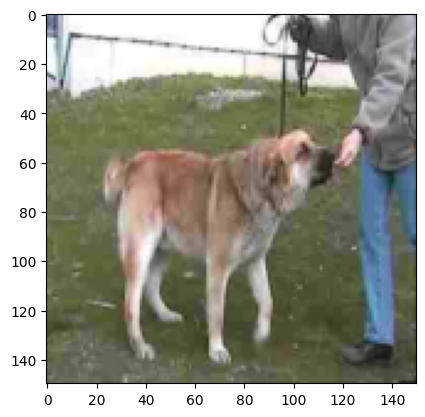

In [14]:
plt.imshow(img)
plt.show()

In [15]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 150, 150, 3)
1/1 [==============================] - 0s 349ms/step
Result:  [[1.]]
